In [8]:
from pytorch_pretrained_bert.tokenization import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese", do_lower_case=True)

In [11]:
text="[MASK] [MASK] more happy 搂哼哧吭导读：联发科在7月31日的法说会上给出了比欧系外资机构预估的业绩更差，预估第三季毛利率约介于42.5%~45.5%之间，较第二季的45.9%进一步下滑，全年营收从成长10%转为衰退5~10%..."
#text='\t'.join(text)
tokenizer.tokenize(text)

['[MASK]',
 '[MASK]',
 'more',
 'happy',
 '搂',
 '哼',
 '哧',
 '吭',
 '导',
 '读',
 '：',
 '联',
 '发',
 '科',
 '在',
 '7',
 '月',
 '31',
 '日',
 '的',
 '法',
 '说',
 '会',
 '上',
 '给',
 '出',
 '了',
 '比',
 '欧',
 '系',
 '外',
 '资',
 '机',
 '构',
 '预',
 '估',
 '的',
 '业',
 '绩',
 '更',
 '差',
 '，',
 '预',
 '估',
 '第',
 '三',
 '季',
 '毛',
 '利',
 '率',
 '约',
 '介',
 '于',
 '42',
 '.',
 '5',
 '%',
 '~',
 '45',
 '.',
 '5',
 '%',
 '之',
 '间',
 '，',
 '较',
 '第',
 '二',
 '季',
 '的',
 '45',
 '.',
 '9',
 '%',
 '进',
 '一',
 '步',
 '下',
 '滑',
 '，',
 '全',
 '年',
 '营',
 '收',
 '从',
 '成',
 '长',
 '10',
 '%',
 '转',
 '为',
 '衰',
 '退',
 '5',
 '~',
 '10',
 '%',
 '.',
 '.',
 '.']

In [12]:
wlist=[1,2,3,4]
for w in wlist:
    w=0
print(wlist)

[1, 2, 3, 4]


In [80]:
import pandas as pd
import json
raw=pd.read_csv("../data/result/old.csv")

In [88]:
raw.loc[:,'news_res']=0
raw.loc[:,'story_res']=0
raw.loc[:,'chat_res']=0

In [89]:
raw

,Character,Train set,news,story,chitchat,news_res,story_res,chat_res
0,一,NaN,96.94000,98.00000,97.9800,0,0,0
1,不,NaN,100.00000,99.00000,98.0000,0,0,0
2,与,2940.0,100.00000,100.00000,100.0000,0,0,0
3,丧,335.0,73.00000,80.00000,80.0000,0,0,0
4,中,4832.0,99.49000,99.00000,95.2800,0,0,0
5,为,29028.0,92.50000,95.00000,93.3200,0,0,0
6,乐,2003.0,96.48000,90.54000,88.2400,0,0,0
7,乘,NaN,100.00000,95.00000,100.0000,0,0,0
8,什,447.0,95.95000,93.10000,48.3900,0,0,0
9,仔,NaN,68.69000,54.55000,56.0000,0,0,0


In [90]:
res_path="D:\\hasu\\nomask"
with open(res_path+"/story.json",encoding='utf8') as f:
    story=json.loads(f.read())
with open(res_path+"/news.json",encoding='utf8') as f:
    news=json.loads(f.read())
with open(res_path+"/chat.json",encoding='utf8') as f:
    chat=json.loads(f.read())
    
for i in range(len(raw)-1):
    char=raw.loc[i,'Character'].strip()
    raw.loc[i,'news_res']=news[char]*100
    raw.loc[i,'story_res']=story[char]*100
    raw.loc[i,'chat_res']=chat[char]*100

In [84]:
res_path="D:\\hasu\\result-30M"
with open(res_path+"/story.json",encoding='utf8') as f:
    story=json.loads(f.read())
    
for i in range(len(raw)-1):
    char=raw.loc[i,'Character'].strip()
    raw.loc[i,'story_res']=story[char]*100

In [91]:
raw

,Character,Train set,news,story,chitchat,news_res,story_res,chat_res
0,一,NaN,96.94000,98.00000,97.9800,90.909091,85.000000,91.919192
1,不,NaN,100.00000,99.00000,98.0000,97.000000,94.000000,98.000000
2,与,2940.0,100.00000,100.00000,100.0000,99.000000,100.000000,100.000000
3,丧,335.0,73.00000,80.00000,80.0000,68.000000,84.000000,77.000000
4,中,4832.0,99.49000,99.00000,95.2800,99.333333,99.000000,97.166667
5,为,29028.0,92.50000,95.00000,93.3200,98.000000,96.000000,97.500000
6,乐,2003.0,96.48000,90.54000,88.2400,97.989950,88.888889,92.929293
7,乘,NaN,100.00000,95.00000,100.0000,100.000000,95.000000,100.000000
8,什,447.0,95.95000,93.10000,48.3900,98.989899,96.969697,71.134021
9,仔,NaN,68.69000,54.55000,56.0000,96.969697,96.969697,93.000000


In [92]:
raw.to_csv("../data/result/res_all.csv",index=False,encoding='utf8')

In [47]:
with open("../data/info.json",encoding='utf8') as f:
    info=json.loads(f.read())

In [48]:
len(info['words_prepared'])

79

In [49]:
wp=set(info['words_prepared'])
plist=[]
nlist=[]
for i in range(len(raw)):
    if raw.loc[i,'Character']in wp:
        plist.append(i)
    else:
        nlist.append(i)

In [93]:
res_prepared=raw.loc[plist]
res_prepared.to_csv("../data/result/res_prepared.csv",index=False,encoding='utf8')

In [94]:
res_new=raw.loc[nlist]
res_new.to_csv("../data/result/res_new.csv",index=False,encoding='utf8')

In [39]:
with open("../data/train.json",encoding='utf8') as f:
    da=json.loads(f.read())

In [41]:
mlen=0
for d in da:
    if mlen<len(d['phone']):
        print(d['phone'])
        mlen=len(d['phone'])
print(mlen)

[[20, '挨ga a_l eh_h']]
[[0, '一yi i_h i_l'], [4, '发f a_h a_h']]
[[9, '与yv v_l v_l'], [15, '的d el_m el_m'], [21, '强qi aa_l ng_h'], [22, '的d el_m el_m']]
[[0, '不bu u_h u_l'], [2, '不bu u_h u_l'], [6, '的d el_m el_m'], [13, '的d el_m el_m'], [14, '不bu u_h u_l']]
[[7, '一yi i_l i_h'], [9, '和h el_l el_h'], [12, '一yi i_l i_h'], [14, '的d el_m el_m'], [16, '不bu u_h u_l'], [20, '的d el_m el_m']]
[[0, '一yi i_l i_h'], [6, '的d el_m el_m'], [7, '一yi i_l i_h'], [10, '的d el_m el_m'], [11, '一yi i_l i_h'], [14, '的d el_m el_m'], [15, '没m eh_l i_h'], [18, '的d el_m el_m']]
[[3, '更g el_h ng_l'], [4, '好h aa_l o_l'], [5, '的d el_m el_m'], [9, '的d el_m el_m'], [11, '作zu o_h o_l'], [15, '的d el_m el_m'], [16, '更g el_h ng_l'], [18, '把b a_l a_l'], [20, '和h el_l el_h']]
[[1, '的d el_m el_m'], [2, '发f a_h a_h'], [5, '发f a_h a_h'], [8, '发f a_h a_h'], [18, '发f a_h a_h'], [22, '卡k a_l a_l'], [27, '发f a_h a_h'], [34, '间ji a_h nn_h'], [41, '的d el_m el_m'], [56, '拉l a_h a_h'], [66, '卡k a_l a_l'], [68, '间ji a_h nn_h'], [72, '卡k a

In [78]:
a={'a':2,'b':1}

In [69]:
a[0]=1

In [71]:
a={'b': 1}

<module 'matplotlib.pyplot' from 'D:\\app\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

D:\app\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


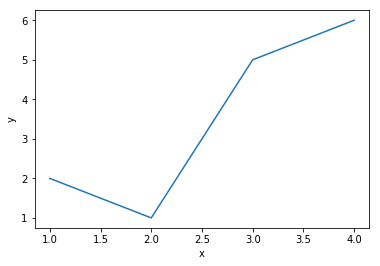

In [105]:
import matplotlib.pyplot as plt
from pylab import mpl

plt.plot([1, 2, 3, 4], [2, 1, 5, 6])
plt.title('')
plt.xlabel('x')
plt.ylabel('y')
plt

In [126]:
from pyecharts import Line
import json


path="D:\\hasu\\count\\"
attr = ['1','3','5','7']
line = Line('折线')
with open(path+"0.json",encoding='utf8') as f:
    dct={k:[] for k in json.loads(f.read())}
for i in [0,3,5,7]:
    with open(path+str(i)+".json",encoding='utf8') as f:
        js=json.loads(f.read())
        for k in js:
            dct[k].append(js[k])   
for k in ['模','咯','岗','倒','好','没']:
    #if abs(dct[k][3]-dct[k][0])>0.1:
    line.add(k,attr,dct[k]) 
line

In [141]:
ls=[('模', 55), ('咯', 68), ('岗', 94), ('旋', 142), ('禁', 213), ('翘', 221), ('拧', 284), ('哄', 317), ('叉', 327), ('丧', 335), ('漂', 362), ('担', 363), ('蹬', 370), ('钉', 399), ('凿', 423), ('什', 447), ('冠', 455), ('炸', 522), ('削', 531), ('舍', 545), ('卒', 563), ('嚼', 580), ('杆', 587), ('载', 628), ('校', 648), ('挨', 660), ('扇', 665), ('秤', 670), ('搂', 673), ('度', 695), ('降', 712), ('吐', 741), ('观', 748), ('划', 844), ('量', 852), ('溜', 862), ('称', 900), ('行', 900), ('空', 900), ('乐', 900), ('难', 900), ('片', 900), ('系', 900), ('血', 900), ('呱', 903), ('横', 907), ('散', 925), ('殷', 941), ('咽', 946), ('蒙', 1013), ('斗', 1037), ('圈', 1050), ('咔', 1051), ('露', 1074), ('宁', 1087), ('奔', 1162), ('查', 1272), ('栅', 1274), ('扒', 1300), ('假', 1324), ('挑', 1336), ('劈', 1391), ('剥', 1495), ('调', 1604), ('弹', 1631), ('勒', 1645), ('泊', 1799), ('相', 1800), ('曝', 1830), ('教', 2028), ('盛', 2207), ('咧', 2309), ('雀', 2350), ('晃', 2421), ('撒', 2424), ('缝', 2436), ('将', 2448), ('藏', 2462), ('铺', 2477), ('数', 2480), ('卷', 2565), ('爪', 2610), ('柏', 2677), ('待', 2857), ('分', 2948), ('应', 3123), ('侯', 3233), ('颤', 3425), ('笼', 3827), ('抹', 3833), ('只', 3881), ('得', 4180), ('觉', 4185), ('肖', 4440), ('攒', 4740), ('中', 4832), ('淋', 4870), ('帖', 4878), ('撩', 5008), ('坊', 5264), ('嘎', 5560), ('伯', 6415), ('重', 6494), ('当', 6681), ('传', 6706), ('背', 6862), ('乘', 7073), ('荷', 7310), ('长', 7460), ('薄', 7532), ('菲', 7670), ('粘', 8319), ('脏', 8319), ('晕', 8394), ('扎', 8395), ('燕', 8400), ('著', 8606), ('拓', 9418), ('趟', 9589), ('咖', 9610), ('糊', 9866), ('壳', 10064), ('肚', 11326), ('凉', 11791), ('差', 11826), ('曾', 11994), ('朝', 13410), ('钻', 13442), ('地', 13817), ('塞', 14416), ('吓', 14996), ('仔', 15112), ('炮', 15306), ('为', 15433), ('磨', 15711), ('夹', 16107), ('喷', 16543), ('腾', 18200), ('泡', 19141), ('涨', 19774), ('曲', 22513), ('占', 23408), ('暴', 28490), ('折', 29668), ('宿', 29915), ('脚', 30544), ('熟', 34448), ('累', 34664), ('陆', 34758), ('混', 35188), ('冲', 36130), ('落', 38640), ('恶', 40629), ('奇', 40693), ('倒', 40953), ('喝', 44673), ('兴', 47913), ('切', 48620), ('答', 50218), ('择', 50790), ('角', 51828), ('俩', 52465), ('省', 57022), ('咋', 69033), ('约', 73604), ('率', 77572), ('核', 84316), ('供', 99537), ('拉', 108604), ('强', 121299), ('转', 139427), ('处', 142045), ('卡', 174361), ('更', 186532), ('干', 190924), ('解', 192178), ('格', 207091), ('与', 209531), ('结', 215496), ('种', 216287), ('少', 281651), ('通', 288696), ('几', 304940), ('着', 305582), ('别', 328632), ('间', 372788), ('号', 377125), ('把', 398180), ('作', 435147), ('和', 705012), ('打', 768680), ('发', 882183), ('都', 1180878), ('看', 1221878), ('还', 1289386), ('好', 1352418), ('没', 1584855), ('一', 2984493), ('不', 4117251), ('的', 6939223)]
ssm,sma,mid,lar=[],[],[],[]
for i in range(50):
    ssm.append(ls[i][0])
for i in range(50,100):
    sma.append(ls[i][0])
for i in range(100,150):
    mid.append(ls[i][0])
for i in range(150,200):
    lar.append(ls[i][0])
ss=[0]*4   
s=[0]*4
m=[0]*4
l=[0]*4
for k in dct:
    if k in ssm:
        for i in range(4):
            ss[i]+=dct[k][i]
    if k in sma:
        for i in range(4):
            s[i]+=dct[k][i]
    elif k in mid:
        for i in range(4):
            m[i]+=dct[k][i]
    elif k in lar:
        for i in range(4):
            l[i]+=dct[k][i]
for i in range(4):
    ss[i]/=50
    s[i]/=50
    m[i]/=50
    l[i]/=50
import matplotlib.pyplot as plt
 
plt.figure(1)
l1=plt.plot([1, 3, 5, 7], ss)
l2=plt.plot([1, 3, 5, 7], s)
l3=plt.plot([1, 3, 5, 7], m)
l4=plt.plot([1, 3, 5, 7], l)

plt.legend((l1[0], l2[0], l3[0], l4[0]), ('1', '2','3','4'))
plt

<module 'matplotlib.pyplot' from 'D:\\app\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

D:\app\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


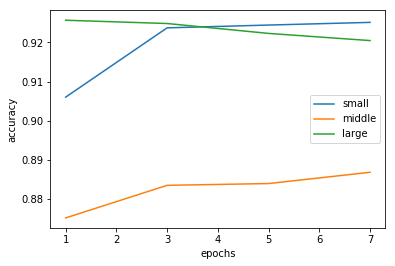

In [162]:
ls=[('模', 55), ('咯', 68), ('岗', 94), ('旋', 142), ('禁', 213), ('翘', 221), ('拧', 284), ('哄', 317), ('叉', 327), ('丧', 335), ('漂', 362), ('担', 363), ('蹬', 370), ('钉', 399), ('凿', 423), ('什', 447), ('冠', 455), ('炸', 522), ('削', 531), ('舍', 545), ('卒', 563), ('嚼', 580), ('杆', 587), ('载', 628), ('校', 648), ('挨', 660), ('扇', 665), ('秤', 670), ('搂', 673), ('度', 695), ('降', 712), ('吐', 741), ('观', 748), ('划', 844), ('量', 852), ('溜', 862), ('称', 900), ('行', 900), ('空', 900), ('乐', 900), ('难', 900), ('片', 900), ('系', 900), ('血', 900), ('呱', 903), ('横', 907), ('散', 925), ('殷', 941), ('咽', 946), ('蒙', 1013), ('斗', 1037), ('圈', 1050), ('咔', 1051), ('露', 1074), ('宁', 1087), ('奔', 1162), ('查', 1272), ('栅', 1274), ('扒', 1300), ('假', 1324), ('挑', 1336), ('劈', 1391), ('剥', 1495), ('调', 1604), ('弹', 1631), ('勒', 1645), ('泊', 1799), ('相', 1800), ('曝', 1830), ('教', 2028), ('盛', 2207), ('咧', 2309), ('雀', 2350), ('晃', 2421), ('撒', 2424), ('缝', 2436), ('将', 2448), ('藏', 2462), ('铺', 2477), ('数', 2480), ('卷', 2565), ('爪', 2610), ('柏', 2677), ('待', 2857), ('分', 2948), ('应', 3123), ('侯', 3233), ('颤', 3425), ('笼', 3827), ('抹', 3833), ('只', 3881), ('得', 4180), ('觉', 4185), ('肖', 4440), ('攒', 4740), ('中', 4832), ('淋', 4870), ('帖', 4878), ('撩', 5008), ('坊', 5264), ('嘎', 5560), ('伯', 6415), ('重', 6494), ('当', 6681), ('传', 6706), ('背', 6862), ('乘', 7073), ('荷', 7310), ('长', 7460), ('薄', 7532), ('菲', 7670), ('粘', 8319), ('脏', 8319), ('晕', 8394), ('扎', 8395), ('燕', 8400), ('著', 8606), ('拓', 9418), ('趟', 9589), ('咖', 9610), ('糊', 9866), ('壳', 10064), ('肚', 11326), ('凉', 11791), ('差', 11826), ('曾', 11994), ('朝', 13410), ('钻', 13442), ('地', 13817), ('塞', 14416), ('吓', 14996), ('仔', 15112), ('炮', 15306), ('为', 15433), ('磨', 15711), ('夹', 16107), ('喷', 16543), ('腾', 18200), ('泡', 19141), ('涨', 19774), ('曲', 22513), ('占', 23408), ('暴', 28490), ('折', 29668), ('宿', 29915), ('脚', 30544), ('熟', 34448), ('累', 34664), ('陆', 34758), ('混', 35188), ('冲', 36130), ('落', 38640), ('恶', 40629), ('奇', 40693), ('倒', 40953), ('喝', 44673), ('兴', 47913), ('切', 48620), ('答', 50218), ('择', 50790), ('角', 51828), ('俩', 52465), ('省', 57022), ('咋', 69033), ('约', 73604), ('率', 77572), ('核', 84316), ('供', 99537), ('拉', 108604), ('强', 121299), ('转', 139427), ('处', 142045), ('卡', 174361), ('更', 186532), ('干', 190924), ('解', 192178), ('格', 207091), ('与', 209531), ('结', 215496), ('种', 216287), ('少', 281651), ('通', 288696), ('几', 304940), ('着', 305582), ('别', 328632), ('间', 372788), ('号', 377125), ('把', 398180), ('作', 435147), ('和', 705012), ('打', 768680), ('发', 882183), ('都', 1180878), ('看', 1221878), ('还', 1289386), ('好', 1352418), ('没', 1584855), ('一', 2984493), ('不', 4117251), ('的', 6939223)]
ssm,sma,mid,lar=[],[],[],[]
for i in range(66):
    sma.append(ls[i][0])
for i in range(66,132):
    mid.append(ls[i][0])
for i in range(132,200):
    lar.append(ls[i][0])
ss=[0]*4   
s=[0]*4
m=[0]*4
l=[0]*4
for k in dct:
    if k in ssm:
        for i in range(4):
            ss[i]+=dct[k][i]
    if k in sma:
        for i in range(4):
            s[i]+=dct[k][i]
    elif k in mid:
        for i in range(4):
            m[i]+=dct[k][i]
    elif k in lar:
        for i in range(4):
            l[i]+=dct[k][i]
for i in range(4):
    ss[i]/=50
    s[i]/=66
    m[i]/=66
    l[i]/=67
import matplotlib.pyplot as plt
 
plt.figure(1)
l2=plt.plot([1, 3, 5, 7], s)
l3=plt.plot([1, 3, 5, 7], m)
l4=plt.plot([1, 3, 5, 7], l)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend((l2[0], l3[0], l4[0]), ( 'small','middle','large'))
plt

<module 'matplotlib.pyplot' from 'D:\\app\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

D:\app\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


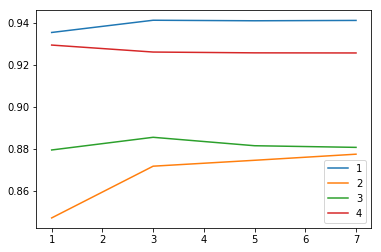

In [155]:
ma={k:max(dct[k]) for k in dct}

In [161]:
sum([ma[k] for k in info['words_ime']])/len(info['words_ime'])

0.8989329923467922

In [169]:
import pygal                                                       # First import pygal
bar_chart = pygal.Bar()                                            # Then create a bar graph object
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])  # Add some values
bar_chart.render_in_browser()

file://C:/Users/t-hasu/AppData/Local/Temp/tmpi9c9dxv4.html


In [171]:
import numpy as np
a=np.zeros((3,3))